In [ ]:

# Import System Libraries

# Import Kaggle Dataset (student-performance-factors)
import kagglehub

# Import Core Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Sckit-learn for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")
print("Path to dataset files:", path)


# Load the CSV File
df = pd.read_csv(path + "/StudentPerformanceFactors.csv")


# Explore the Data and Clean if missing values
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing values per column:\n", df.isna().sum())


# Fill in row with missing values with median of the column
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

C:\Users\knguy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\knguy\.cache\kagglehub\datasets\lainguyn123\student-performance-factors\versions\9
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6          

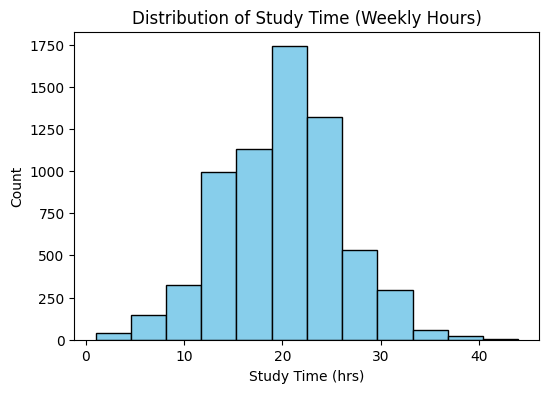

In [ ]:

# Histogram of Study Time
plt.figure(figsize=(6,4))
plt.hist(df['Hours_Studied'], bins=12, color="skyblue", edgecolor="black")
plt.title("Distribution of Study Time (Weekly Hours)")
plt.xlabel("Study Time (hrs)"); plt.ylabel("Count")
plt.show()


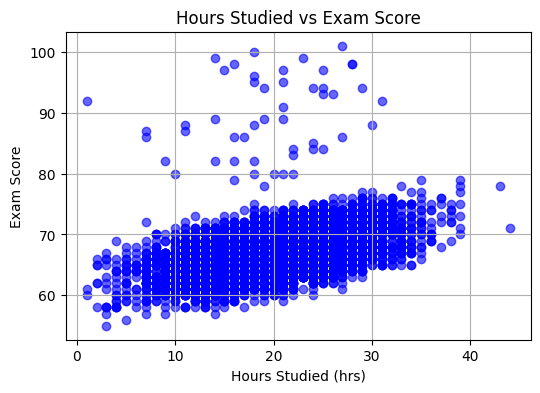

In [ ]:

# Scatter plot of Hours Studied vs Exam Score
plt.figure(figsize=(6,4))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue', alpha=0.6)
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied (hrs)"); plt.ylabel("Exam Score")
plt.grid(True)
plt.show()


In [ ]:
# Features and Targets for Linear Regression Model
X = df[['Hours_Studied', 'Attendance', 'Sleep_Hours']]
y = df['Exam_Score']


# Split into Training and Testing Sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
pipeline.fit(X_train, y_train)


# Evaluate the Model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


# Make Predictions
new_data = pd.DataFrame({
    'Hours_Studied': [10, 15],
    'Attendance_Rate': [90, 95],
    'Sleep_Hours': [7, 8]
})  

Mean Squared Error: 5.82
R^2 Score: 0.59
Mean Absolute Error: 1.47


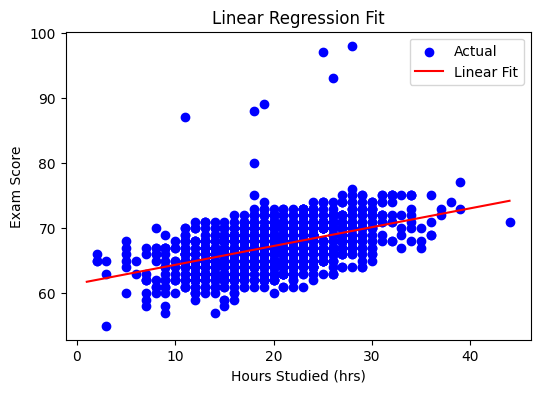

In [ ]:

# Plotting: Hours_Studied vs Exam_Score with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_test['Hours_Studied'], y_test, color="blue", label="Actual")

# Regression line for Hours_Studied
x_range = np.linspace(X['Hours_Studied'].min(), X['Hours_Studied'].max(), 200)
X_line = pd.DataFrame({
    'Hours_Studied': x_range,
    'Attendance': np.mean(X['Attendance']),
    'Sleep_Hours': np.mean(X['Sleep_Hours'])
})
y_line = pipeline.predict(X_line)
plt.plot(x_range, y_line, color="red", label="Linear Fit")

plt.xlabel("Hours Studied (hrs)")
plt.ylabel("Exam Score")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()
